In [31]:
# Load libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load Hr Data
df_HR = pd.read_csv('hr_data.csv')
# Laod employee satisfaction Evaluation data
df_empSat=pd.read_excel('employee_satisfaction_evaluation.xlsx')

In [8]:
df_empSat.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [9]:
df_empSat.shape

(14999, 3)

In [3]:
df_HR.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [4]:
df_HR.shape

(14999, 9)

In [5]:
df_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
employee_id              14999 non-null int64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [6]:
df_HR.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
df_HR.columns

Index(['employee_id', 'number_project', 'average_montly_hours',
       'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years',
       'department', 'salary'],
      dtype='object')

In [11]:
df_empSat.columns

Index(['EMPLOYEE #', 'satisfaction_level', 'last_evaluation'], dtype='object')

In [12]:
# lets merge and join both the dataframe by their employee id

#df.set_index('key').join(other.set_index('key'))
df_main=df_HR.set_index('employee_id').join(df_empSat.set_index('EMPLOYEE #'))

In [14]:
df_main.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
employee_id,,,,,,,,,,
1003,2,157,3,0,1,0,sales,low,0.38,0.53
1005,5,262,6,0,1,0,sales,medium,0.80,0.86
1486,7,272,4,0,1,0,sales,medium,0.11,0.88
1038,5,223,5,0,1,0,sales,low,0.72,0.87
1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [19]:
df_main.reset_index(inplace=True)

In [20]:
df_main.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [21]:
df_main.shape


(14999, 11)

# Handling Missing values

In [25]:
#Check missing values
df_main.isnull().sum()

employee_id               0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

In [27]:
# Impute the missing value with mean() values
df_main = df_main.fillna(df_main.mean())

In [28]:
df_main.isnull().sum()

employee_id              0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
satisfaction_level       0
last_evaluation          0
dtype: int64

# Exploratory Data Analysis (EDA)

In [30]:
# Perform Univariate analysis
# Remove 'employee_id column'
df_main.drop('employee_id', axis=1, inplace=True)
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


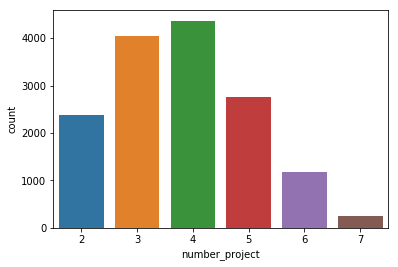

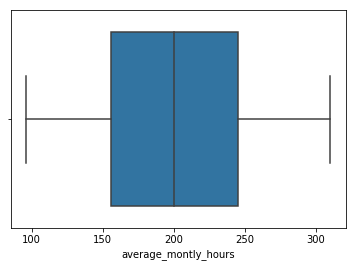

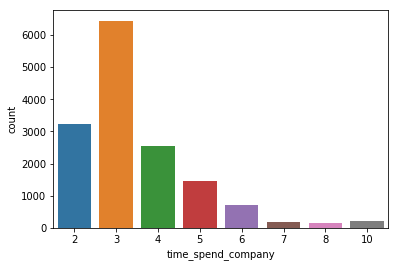

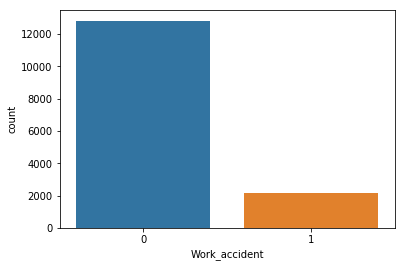

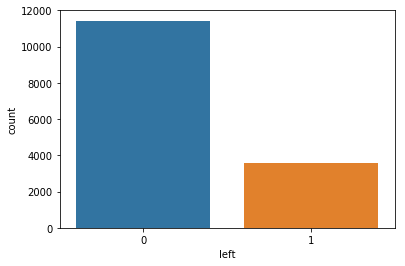

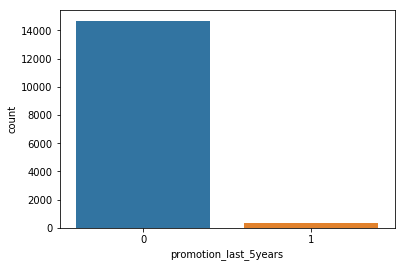

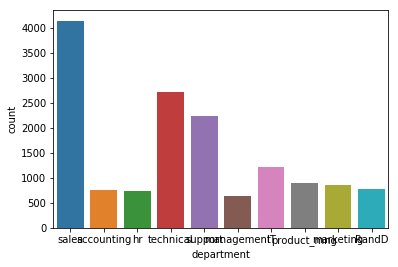

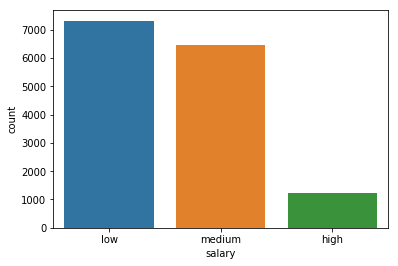

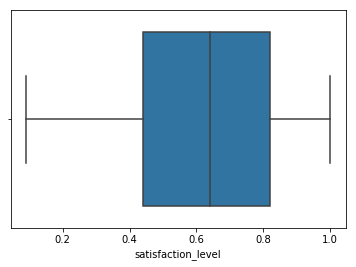

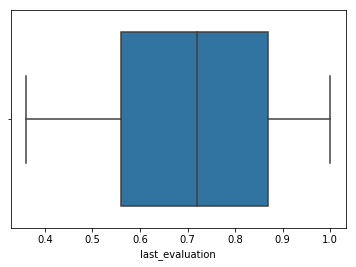

In [38]:
# for contineous variable let build boxplot
# for categorical variable build count plot
for col in df_main.columns:
    if df_main[col].dtype=='object':
        # count plot
        sns.countplot(df_main[col])
        plt.show()
    else:
        if len(df_main[col].unique()) < 10 :
            # count plot
            sns.countplot(df_main[col])
            plt.show()
        else:
            # boxplot
            sns.boxplot(df_main[col])
            plt.show()
    


number_project


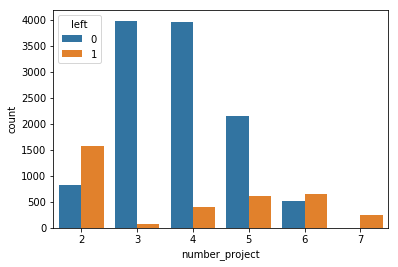

average_montly_hours


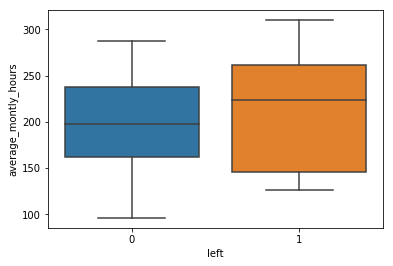

time_spend_company


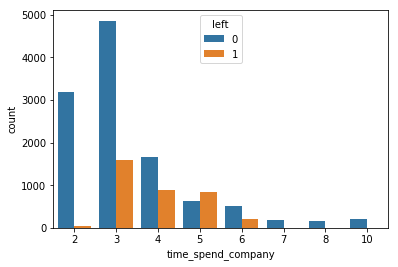

Work_accident


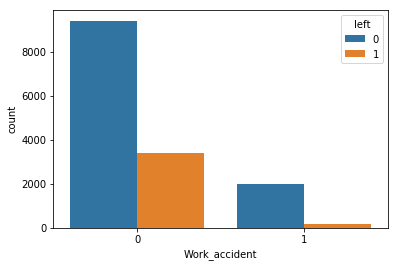

promotion_last_5years


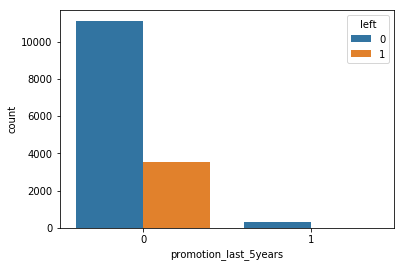

department


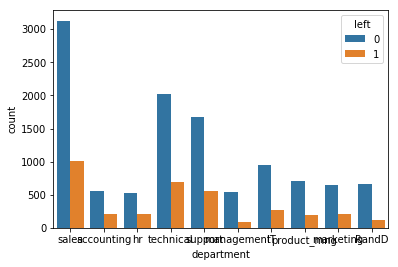

salary


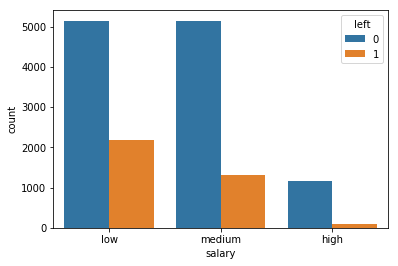

satisfaction_level


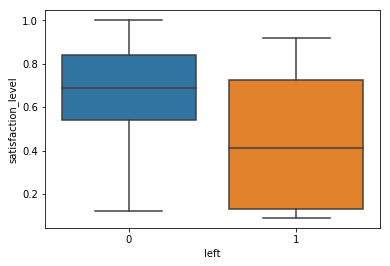

last_evaluation


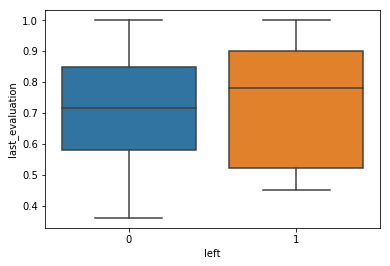

In [44]:
# Bivariate Analysis
# The output column if 'left' column which is categorical column
for col in df_main.columns:
    
    if col != 'left':
        print(col)
        if df_main[col].dtype == 'object':
            # Cat vs Cat count plot with hue
            
            sns.countplot(df_main[col], hue=df_main['left'])
            plt.show()
        else:
            if len(df_main[col].unique()) < 10 :
                # count plot
                sns.countplot(df_main[col], hue=df_main['left'])
                plt.show()
            else:
                # boxplot
                sns.boxplot( df_main['left'], df_main[col])
                plt.show()

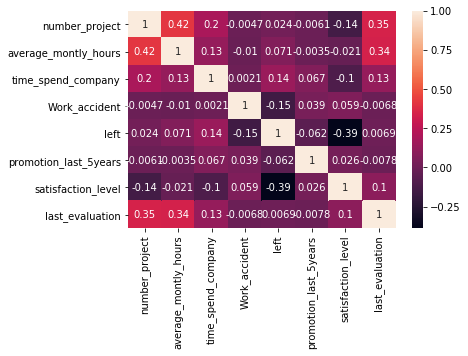

In [43]:
# Mulivariate Analysis
sns.heatmap(df_main.corr(), annot=True)

In [50]:
# Feature Engineering
# convert categorical variable into contineous 
df_main = pd.get_dummies(df_main, prefix_sep='_', drop_first=True)

In [51]:
df_main.shape

(14999, 19)

In [56]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
number_project            14999 non-null int64
average_montly_hours      14999 non-null int64
time_spend_company        14999 non-null int64
Work_accident             14999 non-null int64
left                      14999 non-null int64
promotion_last_5years     14999 non-null int64
satisfaction_level        14999 non-null float64
last_evaluation           14999 non-null float64
department_RandD          14999 non-null uint8
department_accounting     14999 non-null uint8
department_hr             14999 non-null uint8
department_management     14999 non-null uint8
department_marketing      14999 non-null uint8
department_product_mng    14999 non-null uint8
department_sales          14999 non-null uint8
department_support        14999 non-null uint8
department_technical      14999 non-null uint8
salary_low                14999 non-null uint8
salary_medium             14999 non-null 

In [57]:
df_main.describe()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.00000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.61283,0.716125,0.052470,0.051137,0.049270,0.042003,0.057204,0.060137,0.276018,0.148610,0.181345,0.487766,0.429762
std,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.24849,0.170984,0.222981,0.220284,0.216438,0.200602,0.232239,0.237749,0.447041,0.355715,0.385317,0.499867,0.495059
min,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.09000,0.360000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.44000,0.560000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.64000,0.720000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.82000,0.870000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
X = df_main.drop('left', axis=1).values
y = df_main['left'].values

In [92]:
# Let's build the model
# split the data in train and test part
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [94]:
# As data has various types of magnitude/scales let's Standardise the scaling
from sklearn.preprocessing import StandardScaler

# here we will scale only train dataset

std_Scale=StandardScaler()
X_train = std_Scale.fit_transform(X_train)
X_test = std_Scale.transform(X_test)

In [95]:
df_train=pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.648718,0.417534,-0.341756,2.454623,-0.146763,0.028284,-1.202102,-0.231431,-0.23023,-0.228418,-0.210906,-0.245295,-0.251909,-0.620553,-0.418593,2.130658,-0.964220,1.138429
1,-0.648718,-0.623258,-1.023620,-0.407394,-0.146763,-0.454181,0.554561,-0.231431,-0.23023,-0.228418,-0.210906,-0.245295,-0.251909,1.611466,-0.418593,-0.469339,1.037108,-0.878404
2,0.971929,0.577656,-0.341756,-0.407394,-0.146763,0.470544,-0.792214,-0.231431,-0.23023,-0.228418,-0.210906,-0.245295,-0.251909,1.611466,-0.418593,-0.469339,1.037108,-0.878404
3,0.161606,-0.903471,-1.023620,-0.407394,-0.146763,0.028284,-1.260657,-0.231431,-0.23023,-0.228418,-0.210906,-0.245295,-0.251909,-0.620553,2.388954,-0.469339,-0.964220,1.138429
4,-0.648718,0.837854,-1.023620,-0.407394,-0.146763,0.269517,-0.382326,-0.231431,-0.23023,-0.228418,-0.210906,-0.245295,-0.251909,1.611466,-0.418593,-0.469339,-0.964220,1.138429


In [96]:
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,1.199900e+04,1.199900e+04,1.199900e+04,1.199900e+04,1.199900e+04,1.199900e+04,1.199900e+04,1.199900e+04,1.199900e+04,1.199900e+04,1.199900e+04,1.199900e+04,1.199900e+04,1.199900e+04,1.199900e+04,1.199900e+04,1.199900e+04,1.199900e+04
mean,-3.034863e-17,-2.467121e-16,1.083298e-16,-3.661358e-16,6.792355e-16,3.516875e-14,3.352410e-14,-7.022422e-16,1.896326e-17,3.412832e-17,-6.194358e-16,1.930543e-15,-1.036739e-15,1.672940e-15,9.183605e-16,2.824828e-17,1.733295e-16,6.423546e-16
std,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00,1.000042e+00
min,-1.459042e+00,-2.104384e+00,-1.023620e+00,-4.073945e-01,-1.467626e-01,-2.102605e+00,-2.080433e+00,-2.314313e-01,-2.302297e-01,-2.284178e-01,-2.109057e-01,-2.452950e-01,-2.519093e-01,-6.205530e-01,-4.185933e-01,-4.693385e-01,-9.642200e-01,-8.784037e-01
25%,-6.487183e-01,-9.034708e-01,-3.417559e-01,-4.073945e-01,-1.467626e-01,-6.954139e-01,-9.093247e-01,-2.314313e-01,-2.302297e-01,-2.284178e-01,-2.109057e-01,-2.452950e-01,-2.519093e-01,-6.205530e-01,-4.185933e-01,-4.693385e-01,-9.642200e-01,-8.784037e-01
50%,1.616055e-01,-2.280091e-02,-3.417559e-01,-4.073945e-01,-1.467626e-01,1.086951e-01,2.756195e-02,-2.314313e-01,-2.302297e-01,-2.284178e-01,-2.109057e-01,-2.452950e-01,-2.519093e-01,-6.205530e-01,-4.185933e-01,-4.693385e-01,-9.642200e-01,-8.784037e-01
75%,9.719294e-01,8.778842e-01,3.401079e-01,-4.073945e-01,-1.467626e-01,8.323933e-01,9.058931e-01,-2.314313e-01,-2.302297e-01,-2.284178e-01,-2.109057e-01,-2.452950e-01,-2.519093e-01,1.611466e+00,-4.185933e-01,-4.693385e-01,1.037108e+00,1.138429e+00
max,2.592577e+00,2.178874e+00,4.431290e+00,2.454623e+00,6.813727e+00,1.556091e+00,1.667114e+00,4.320936e+00,4.343489e+00,4.377943e+00,4.741456e+00,4.076724e+00,3.969683e+00,1.611466e+00,2.388954e+00,2.130658e+00,1.037108e+00,1.138429e+00


# Build/train the model with logistic Regression

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [98]:
log_r = LogisticRegression()

model = log_r.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [99]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [100]:
pred= model.predict(X_test)

In [102]:
# Evaluate the model
print ("The accuracy score of model is {}%".format(accuracy_score(y_test, pred)))
print (confusion_matrix(y_test, pred))
print (classification_report(y_test, pred))

The accuracy score of model is 0.7933333333333333%
[[2135  171]
 [ 449  245]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.87      2306
           1       0.59      0.35      0.44       694

   micro avg       0.79      0.79      0.79      3000
   macro avg       0.71      0.64      0.66      3000
weighted avg       0.77      0.79      0.77      3000



### Build model using Random Forest Classifier

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [104]:
rand_cls = RandomForestClassifier()

model = rand_cls.fit(X_train, y_train)
pred = model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [105]:
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [109]:
# Evaluate the model
print ("The accuracy score of model is {0:02f}%".format(accuracy_score(y_test, pred)))
print (confusion_matrix(y_test, pred))
print (classification_report(y_test, pred))

The accuracy score of model is 0.988333%
[[2300    6]
 [  29  665]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2306
           1       0.99      0.96      0.97       694

   micro avg       0.99      0.99      0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [110]:
# Find out the important features
df_main.drop('left', axis=1).columns

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')

In [111]:
model.feature_importances_

array([0.1522852 , 0.15121483, 0.18276347, 0.00890195, 0.00276396,
       0.37392723, 0.10179998, 0.00118207, 0.00075074, 0.00175032,
       0.00157026, 0.00115924, 0.00135277, 0.00338283, 0.00230782,
       0.00350876, 0.00551946, 0.00385911])

In [114]:
feature_importance = pd.DataFrame(model.feature_importances_, index= pd.DataFrame(X_train).columns,
                                 columns= ['importance']).sort_values('importance', ascending=False)

In [115]:
feature_importance

,importance
5,0.373927
2,0.182763
0,0.152285
1,0.151215
6,0.101800
3,0.008902
16,0.005519
17,0.003859
15,0.003509
13,0.003383


# Conclusion 
### The best model is Random Forest 
### best accuracey is 98.88%